## Group

* Look at what other groups are doing, try the same/similar things
* (A) How the number (or hexbin) of unmasked or density changed along x-y, y-z, x-z?
* (A) Apply box plot to density?
* Use statistics to test differences between z layers?

In [17]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked
print 'end setup'

end setup


## Boxplot of Density

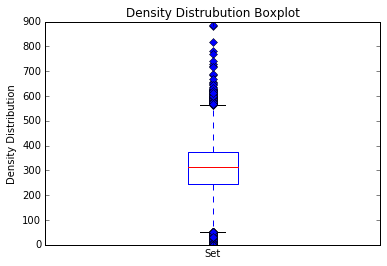

In [5]:
# syn_unmasked_T = syn_unmasked.values.T.tolist()
# columns = [syn_unmasked[i] for i in [4]]

plt.boxplot(syn_unmasked[:,3], 0, 'gD')
plt.xticks([1], ['Set'])
plt.ylabel('Density Distribution')
plt.title('Density Distrubution Boxplot')
plt.show()

### 2) Is the spike noise? More evidence.
We saw from Emily's analysis that there is strong evidence against the spike being noise. If we see that the spike is noticeable in the histogram of synapses as well as the histogram of synapse density, we will gain even more evidence that the spike is noise.

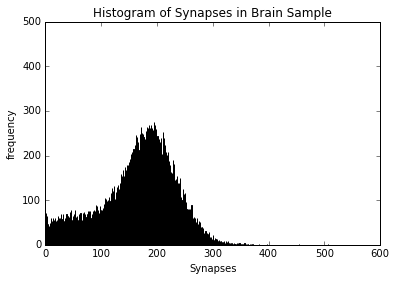

In [6]:
figure = plt.figure()
plt.hist(data_thresholded[:,4],5000)
plt.title('Histogram of Synapses in Brain Sample')
plt.xlabel('Synapses')
plt.ylabel('frequency')

Since we don't see the spike in the histogram of synapses, the spike may be some artifact of the unmasked value. Let's take a look!

### 3) What is the spike? We still don't know.

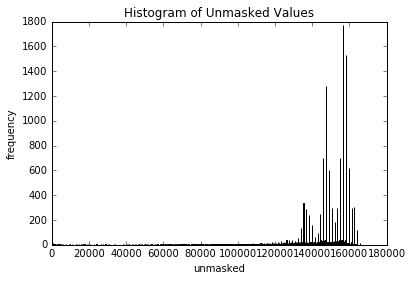

In [7]:
plt.hist(data_thresholded[:,3],5000)
plt.title('Histogram of Unmasked Values')
plt.xlabel('unmasked')
plt.ylabel('frequency')

### 4) Synapses and unmasked: Spike vs Whole Data Set

Average Density:  0.00134070207006
Std Deviation:  8.46720771375e-05
maxbin 0.00131489435301
There are  136  points in the 'spike'


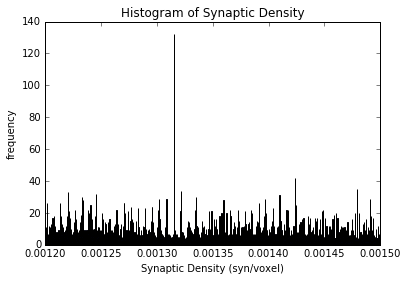

In [8]:
# Spike
a = np.apply_along_axis(lambda x:x[4]/x[3], 1, data_thresholded)
spike = a[np.logical_and(a <= 0.0015, a >= 0.0012)]
print "Average Density: ", np.mean(spike)
print "Std Deviation: ", np.std(spike)

# Histogram
n, bins, _ = plt.hist(spike, 2000)
plt.title('Histogram of Synaptic Density')
plt.xlabel('Synaptic Density (syn/voxel)')
plt.ylabel('frequency')

bin_max = np.where(n == n.max())

print 'maxbin', bins[bin_max][0]

bin_width = bins[1]-bins[0]
syn_normalized[:,3] = syn_normalized[:,3]/(64**3)
spike = syn_normalized[np.logical_and(syn_normalized[:,3] <= 0.00131489435301+bin_width, syn_normalized[:,3] >= 0.00131489435301-bin_width)]
print "There are ", len(spike), " points in the 'spike'"

In [9]:
spike_thres = data_thresholded[np.logical_and(syn_normalized[:,3] <= 0.00131489435301+bin_width, syn_normalized[:,3] >= 0.00131489435301-bin_width)]

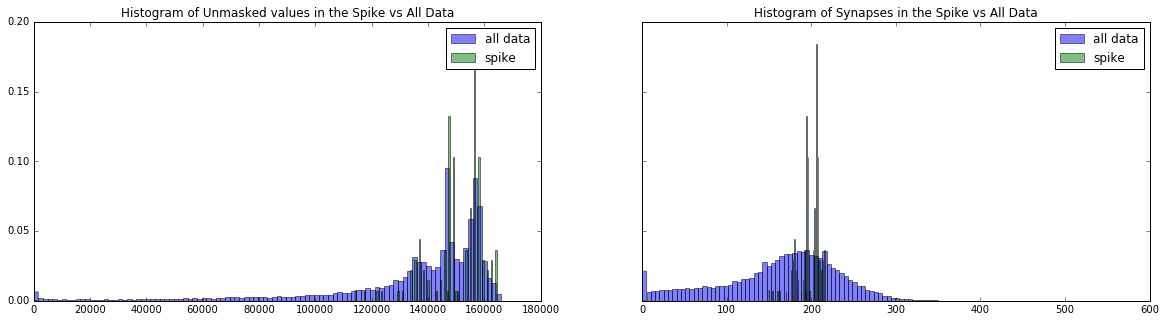

In [10]:
import math
fig, ax = plt.subplots(1,2,sharey = True, figsize=(20,5))
weights = np.ones_like(spike_thres[:,3])/len(spike_thres[:,3])
weights2 = np.ones_like(data_thresholded[:,3])/len(data_thresholded[:,3])

ax[0].hist(data_thresholded[:,3], bins = 100, alpha = 0.5, weights = weights2, label = 'all data')
ax[0].hist(spike_thres[:,3], bins = 100, alpha = 0.5, weights = weights, label = 'spike')
ax[0].legend(loc='upper right')
ax[0].set_title('Histogram of Unmasked values in the Spike vs All Data')

weights = np.ones_like(spike_thres[:,4])/len(spike_thres[:,4])
weights2 = np.ones_like(data_thresholded[:,4])/len(data_thresholded[:,4])

ax[1].hist(data_thresholded[:,4], bins = 100, alpha = 0.5, weights = weights2, label = 'all data')
ax[1].hist(spike_thres[:,4], bins = 100, alpha = 0.5, weights = weights, label = 'spike')
ax[1].legend(loc='upper right')
ax[1].set_title('Histogram of Synapses in the Spike vs All Data')

plt.show()

## Look at only density where

uniques
index: [ 0  1  2  3  4  5  6  7  8  9 10]
counts: [3269 3132 3157 3233 3319 3321 3321 3321 3321 3321 3321]
values: [   55.   166.   277.   388.   499.   610.   721.   832.   943.  1054.
  1165.]
calcuating for z: 55
calcuating for z: 166
calcuating for z: 277
calcuating for z: 388
calcuating for z: 499
calcuating for z: 610
calcuating for z: 721
calcuating for z: 832
calcuating for z: 943
calcuating for z: 1054
calcuating for z: 1165


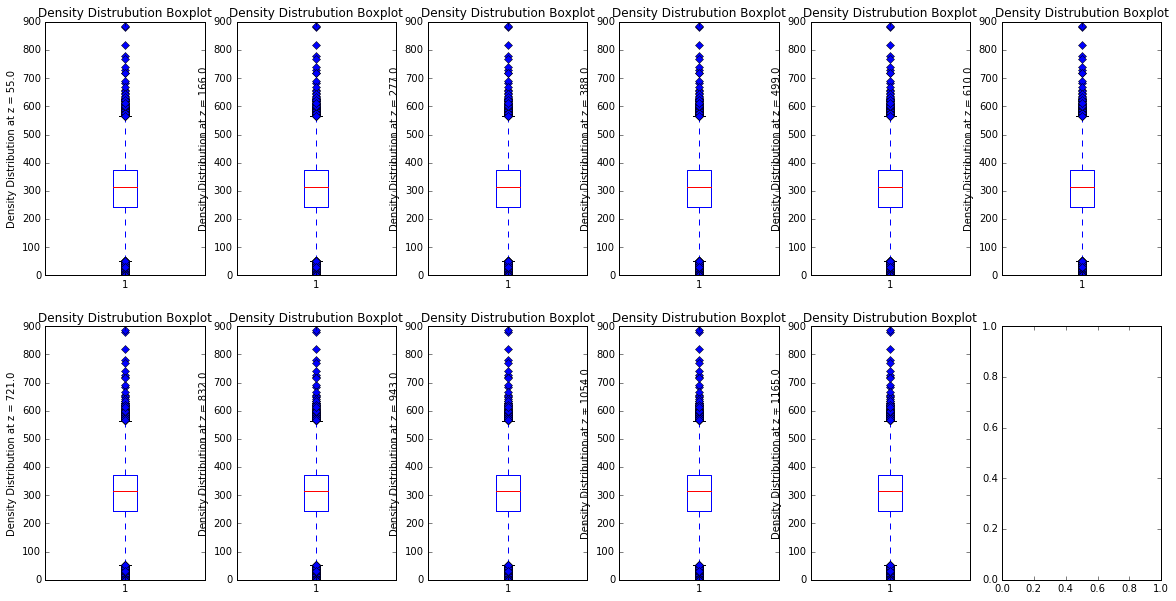

In [47]:

data_uniques, UIndex, UCounts = np.unique(syn_unmasked[:,2], return_index = True, return_counts = True)

print 'uniques'
print 'index: ' + str(UIndex)
print 'counts: ' + str(UCounts)
print 'values: ' + str(data_uniques)

fig, ax = plt.subplots(2,6,figsize=(20,10))
counter = 0

for i in np.unique(syn_unmasked[:,2]):
    print 'calcuating for z: ' + str(int(i))
    
    def check_z(row):
        if row[2] == i:
            return True
        return False
   
    counter += 1
    yind = (counter%6) - 1
    xind = np.floor_divide(counter,7)
     
    index_true = np.where(np.apply_along_axis(check_z, 1, syn_unmasked))
    syn_uniqueZ = syn_unmasked[index_true]
    
    ax[xind,yind].boxplot(syn_unmasked[:,3], 0, 'gD')
    ax[xind,yind].set_xticks([1], [str(i)])
    ax[xind,yind].set_ylabel('Density Distribution at z = ' + str(i))
    ax[xind,yind].set_title('Density Distrubution Boxplot')
plt.show()
    

